/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.22844192057193854
Epoch 200/1000, Loss: 0.22427887256658993
Epoch 300/1000, Loss: 0.2228832261220453
Epoch 400/1000, Loss: 0.22240545827508196
Epoch 500/1000, Loss: 0.2222385059160604
Epoch 600/1000, Loss: 0.22217844660302566
Epoch 700/1000, Loss: 0.22215549526085404
Epoch 800/1000, Loss: 0.22214546314067204
Epoch 900/1000, Loss: 0.22213989555817035
Epoch 1000/1000, Loss: 0.222135820260691
Fold Validation Accuracy: 30.00%
Epoch 100/1000, Loss: 0.2309463195670221
Epoch 200/1000, Loss: 0.22500116798123448
Epoch 300/1000, Loss: 0.22294360071257258
Epoch 400/1000, Loss: 0.22221669154586038
Epoch 500/1000, Loss: 0.22195506617118543
Epoch 600/1000, Loss: 0.22185899837238973
Epoch 700/1000, Loss: 0.22182257663760804
Epoch 800/1000, Loss: 0.22180782830493592
Epoch 900/1000, Loss: 0.22180100302540068
Epoch 1000/1000, Loss: 0.2217970876126691
Fold Validation Accuracy: 23.33%
Epoch 100/1000, Loss: 0.23247982953868285
Epoch 200/1000, Loss: 0.22564822869931556
Epoch 300/1000

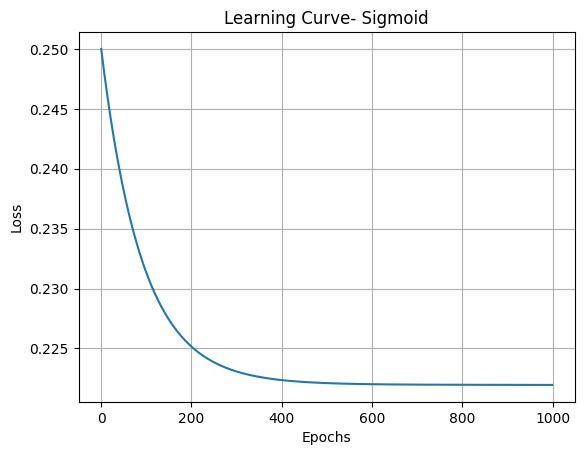

Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.01


In [ ]:
# Part 4 Neural Network-Based Classification
# Designed Neural Network Architecture Effective for Classifying the Iris Species
# Redo, Added Training and Cross Validation
# Some code was borrowed from Professor Mohammadi ECE 5831 Lecture Notes
# Some Methodology was borrowed from Erika Valle-Baird Code from a previous course Available: https://github.com/Airikuh/PolynomialCurveFitting

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Using the Sigmoid Activation Function First
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.sigmoid(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.sigmoid_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- Sigmoid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.22774906415888616
Epoch 200/1000, Loss: 0.22320698047734955
Epoch 300/1000, Loss: 0.22231193034250107
Epoch 400/1000, Loss: 0.22212226913495214
Epoch 500/1000, Loss: 0.22207464502299976
Epoch 600/1000, Loss: 0.22205587522160594
Epoch 700/1000, Loss: 0.22204260104338272
Epoch 800/1000, Loss: 0.22202991315888893
Epoch 900/1000, Loss: 0.22201673672709066
Epoch 1000/1000, Loss: 0.22200279081874366
Fold Validation Accuracy: 30.00%
Epoch 100/1000, Loss: 0.22575481249074664
Epoch 200/1000, Loss: 0.22251327559900594
Epoch 300/1000, Loss: 0.2219359618120471
Epoch 400/1000, Loss: 0.22182151209310427
Epoch 500/1000, Loss: 0.22179144027587763
Epoch 600/1000, Loss: 0.22177698166428608
Epoch 700/1000, Loss: 0.22176526582827344
Epoch 800/1000, Loss: 0.22175383274742208
Epoch 900/1000, Loss: 0.2217421847054777
Epoch 1000/1000, Loss: 0.2217301906033776
Fold Validation Accuracy: 23.33%
Epoch 100/1000, Loss: 0.22782138386188827
Epoch 200/1000, Loss: 0.22301351429036703
Epoch 300/1

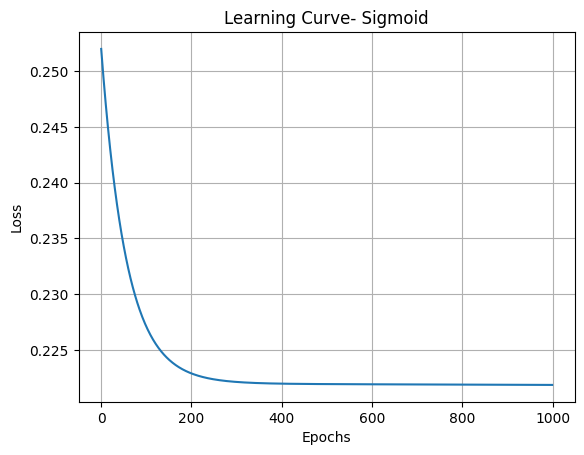

Number of Hidden Layers: 2, Neurons per Layer: 10, 10. Learning Rate: 0.01


In [26]:
# Sigmoid, Learning Rate: 0.01
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Using the Sigmoid Activation Function First
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.sigmoid(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.sigmoid_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- Sigmoid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 10, 10. Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.2220928844727467
Epoch 200/1000, Loss: 0.22202719344991553
Epoch 300/1000, Loss: 0.22191150759411396
Epoch 400/1000, Loss: 0.22167993545387962
Epoch 500/1000, Loss: 0.22114565616033638
Epoch 600/1000, Loss: 0.2196777545105169
Epoch 700/1000, Loss: 0.2148270990334345
Epoch 800/1000, Loss: 0.1980881649888397
Epoch 900/1000, Loss: 0.16050715649604586
Epoch 1000/1000, Loss: 0.12824855461633852
Fold Validation Accuracy: 73.33%
Epoch 100/1000, Loss: 0.22182004398830146
Epoch 200/1000, Loss: 0.22178656117192952
Epoch 300/1000, Loss: 0.22175321773047574
Epoch 400/1000, Loss: 0.22171341843514156
Epoch 500/1000, Loss: 0.22165827885637285
Epoch 600/1000, Loss: 0.22157144083586952
Epoch 700/1000, Loss: 0.22141718639862154
Epoch 800/1000, Loss: 0.2211052319535746
Epoch 900/1000, Loss: 0.2203677419040926
Epoch 1000/1000, Loss: 0.21824669024369306
Fold Validation Accuracy: 23.33%
Epoch 100/1000, Loss: 0.2219066598490758
Epoch 200/1000, Loss: 0.22182566579596705
Epoch 300/1000,

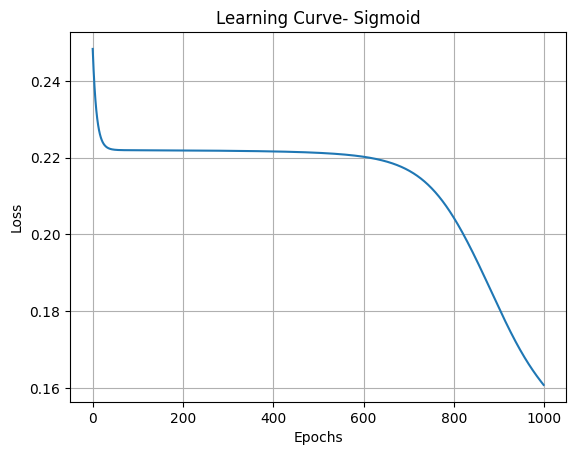

Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.1


In [1]:
# Sigmoid, Learning Rate: 0.1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Using the Sigmoid Activation Function First
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.sigmoid(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.sigmoid_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- Sigmoid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.1")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.22301419718877302
Epoch 200/1000, Loss: 0.22221717242724448
Epoch 300/1000, Loss: 0.22218576446001698
Epoch 400/1000, Loss: 0.22218105813878494
Epoch 500/1000, Loss: 0.222177433326794
Epoch 600/1000, Loss: 0.22217390574973309
Epoch 700/1000, Loss: 0.22217038945292955
Epoch 800/1000, Loss: 0.22216683391301648
Epoch 900/1000, Loss: 0.22216318978229188
Epoch 1000/1000, Loss: 0.2221594061306513
Fold Validation Accuracy: 30.00%
Epoch 100/1000, Loss: 0.22273525486842974
Epoch 200/1000, Loss: 0.2218347293122219
Epoch 300/1000, Loss: 0.22179360715883914
Epoch 400/1000, Loss: 0.22178915563452775
Epoch 500/1000, Loss: 0.221786238151097
Epoch 600/1000, Loss: 0.22178324875830677
Epoch 700/1000, Loss: 0.22178007718120338
Epoch 800/1000, Loss: 0.2217766761145666
Epoch 900/1000, Loss: 0.22177299569969722
Epoch 1000/1000, Loss: 0.2217689794429782
Fold Validation Accuracy: 23.33%
Epoch 100/1000, Loss: 0.22336931625387457
Epoch 200/1000, Loss: 0.22209930356099702
Epoch 300/1000, 

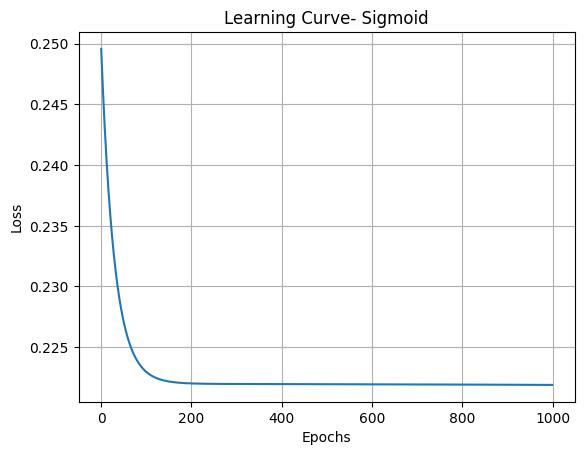

Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.03


In [2]:
# Sigmoid, Learning Rate: 0.03
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Using the Sigmoid Activation Function First
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.sigmoid(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.sigmoid_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- Sigmoid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.03")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.22219432339868195
Epoch 200/1000, Loss: 0.22204894791979055
Epoch 300/1000, Loss: 0.2220071384307381
Epoch 400/1000, Loss: 0.22195773969027902
Epoch 500/1000, Loss: 0.22189751215813192
Epoch 600/1000, Loss: 0.22182294991026433
Epoch 700/1000, Loss: 0.22172924296782423
Epoch 800/1000, Loss: 0.22160968640154366
Epoch 900/1000, Loss: 0.22145476429396244
Epoch 1000/1000, Loss: 0.22125071838071247
Fold Validation Accuracy: 30.00%
Epoch 100/1000, Loss: 0.2219607124245364
Epoch 200/1000, Loss: 0.22168456777764944
Epoch 300/1000, Loss: 0.22162689504387814
Epoch 400/1000, Loss: 0.2215595077484399
Epoch 500/1000, Loss: 0.22147632549993676
Epoch 600/1000, Loss: 0.22137126138889984
Epoch 700/1000, Loss: 0.22123571881046478
Epoch 800/1000, Loss: 0.22105722350336648
Epoch 900/1000, Loss: 0.2208172045334883
Epoch 1000/1000, Loss: 0.22048727923429745
Fold Validation Accuracy: 23.33%
Epoch 100/1000, Loss: 0.22219354688648466
Epoch 200/1000, Loss: 0.22202104450699547
Epoch 300/10

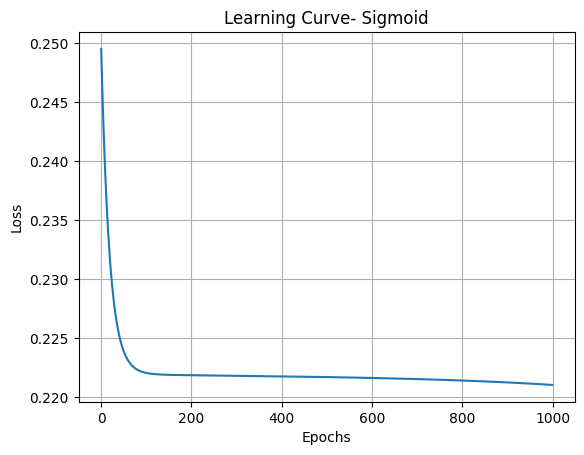

Number of Hidden Layers: 2, Neurons per Layer: 10, 10. Learning Rate: 0.03


In [27]:
# Sigmoid, Learning Rate: 0.03
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Using the Sigmoid Activation Function First
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.sigmoid(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.sigmoid_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- Sigmoid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 10, 10. Learning Rate: 0.03")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.2221497856094371
Epoch 200/1000, Loss: 0.22208978805713192
Epoch 300/1000, Loss: 0.22172272267834978
Epoch 400/1000, Loss: 0.2144845900221278
Epoch 500/1000, Loss: 0.11837028254402221
Epoch 600/1000, Loss: 0.10610268901046441
Epoch 700/1000, Loss: 0.09995075956819678
Epoch 800/1000, Loss: 0.08541649374859109
Epoch 900/1000, Loss: 0.05382194393246336
Epoch 1000/1000, Loss: 0.027467024074141734
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.22171056239681905
Epoch 200/1000, Loss: 0.22130583658583147
Epoch 300/1000, Loss: 0.21429057267634047
Epoch 400/1000, Loss: 0.1260009417376548
Epoch 500/1000, Loss: 0.10487424543596682
Epoch 600/1000, Loss: 0.09459453238556326
Epoch 700/1000, Loss: 0.07326983067160112
Epoch 800/1000, Loss: 0.042079009605644556
Epoch 900/1000, Loss: 0.02394574655637527
Epoch 1000/1000, Loss: 0.01638203088849847
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.2220186487314129
Epoch 200/1000, Loss: 0.2219671111698324
Epoch 300/1

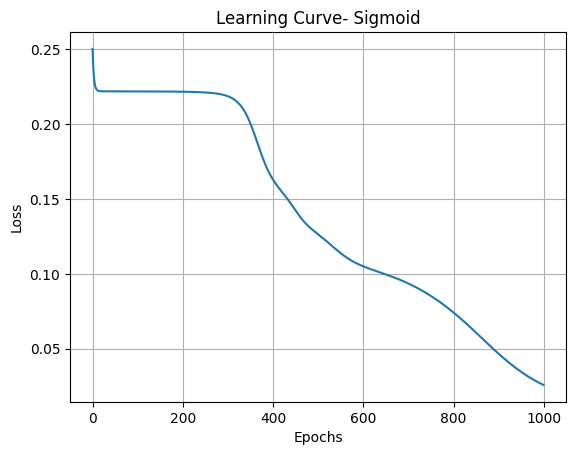

Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.3


In [3]:
# Sigmoid, Learning Rate: 0.3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Using the Sigmoid Activation Function First
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.sigmoid(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.sigmoid_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- Sigmoid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.3")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.23321013000499585
Epoch 200/1000, Loss: 0.22734354268842288
Epoch 300/1000, Loss: 0.22461396071551662
Epoch 400/1000, Loss: 0.2233340989214952
Epoch 500/1000, Loss: 0.2227291731336504
Epoch 600/1000, Loss: 0.22244129156003756
Epoch 700/1000, Loss: 0.22230354534928898
Epoch 800/1000, Loss: 0.22223736295800964
Epoch 900/1000, Loss: 0.2222054653168408
Epoch 1000/1000, Loss: 0.22219005535057113
Fold Validation Accuracy: 30.00%
Epoch 100/1000, Loss: 0.23327837206940932
Epoch 200/1000, Loss: 0.2273666935835115
Epoch 300/1000, Loss: 0.22452127320741921
Epoch 400/1000, Loss: 0.2231412871676783
Epoch 500/1000, Loss: 0.2224665275838695
Epoch 600/1000, Loss: 0.22213420336273862
Epoch 700/1000, Loss: 0.22196955953854117
Epoch 800/1000, Loss: 0.22188760715046021
Epoch 900/1000, Loss: 0.2218466657356797
Epoch 1000/1000, Loss: 0.22182615414488865
Fold Validation Accuracy: 23.33%
Epoch 100/1000, Loss: 0.23582237466878214
Epoch 200/1000, Loss: 0.22861993271919948
Epoch 300/1000,

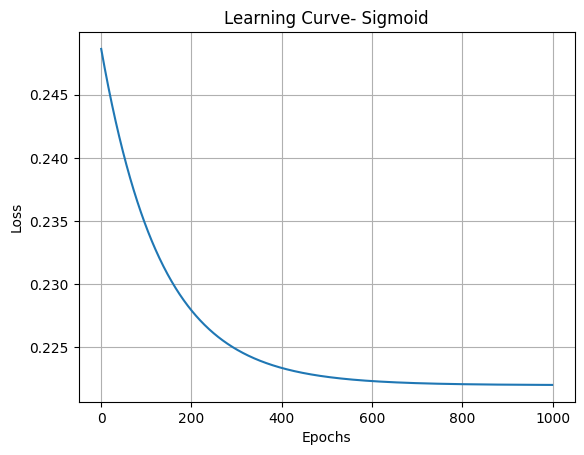

Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.01


In [4]:
# Sigmoid, Changing Number of Hidden Layers & Neurons Per Layer-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Using the Sigmoid Activation Function First
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.sigmoid(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.sigmoid_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- Sigmoid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.22220600738982582
Epoch 200/1000, Loss: 0.22217581300654854
Epoch 300/1000, Loss: 0.22217576344311432
Epoch 400/1000, Loss: 0.2221757470848694
Epoch 500/1000, Loss: 0.2221757307750936
Epoch 600/1000, Loss: 0.22217571446977166
Epoch 700/1000, Loss: 0.2221756981619076
Epoch 800/1000, Loss: 0.22217568184455241
Epoch 900/1000, Loss: 0.22217566551076093
Epoch 1000/1000, Loss: 0.22217564915358542
Fold Validation Accuracy: 30.00%
Epoch 100/1000, Loss: 0.22182890031331684
Epoch 200/1000, Loss: 0.2218056876944205
Epoch 300/1000, Loss: 0.22180563653710295
Epoch 400/1000, Loss: 0.22180560712071354
Epoch 500/1000, Loss: 0.22180557801525785
Epoch 600/1000, Loss: 0.2218055491774005
Epoch 700/1000, Loss: 0.22180552057819772
Epoch 800/1000, Loss: 0.22180549218892157
Epoch 900/1000, Loss: 0.22180546398128215
Epoch 1000/1000, Loss: 0.22180543592739102
Fold Validation Accuracy: 23.33%
Epoch 100/1000, Loss: 0.2220567510113047
Epoch 200/1000, Loss: 0.22203644544262421
Epoch 300/1000

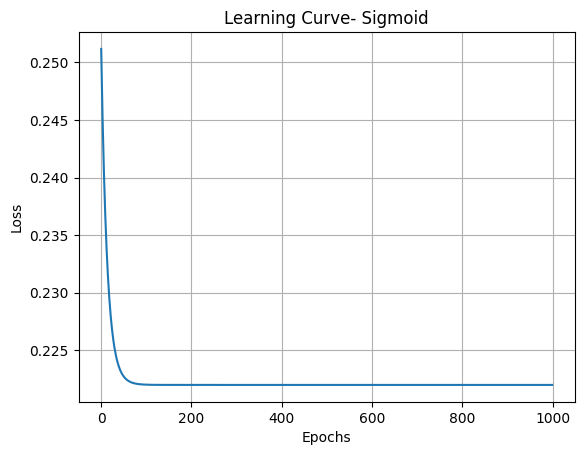

Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.1


In [5]:
# Sigmoid, learning rate 0.1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Using the Sigmoid Activation Function First
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.sigmoid(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.sigmoid_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- Sigmoid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.1")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.22521332457550652
Epoch 200/1000, Loss: 0.22251371458012384
Epoch 300/1000, Loss: 0.22221468283448564
Epoch 400/1000, Loss: 0.22218019814713258
Epoch 500/1000, Loss: 0.22217615450748554
Epoch 600/1000, Loss: 0.22217567413599398
Epoch 700/1000, Loss: 0.22217561365798608
Epoch 800/1000, Loss: 0.22217560279584647
Epoch 900/1000, Loss: 0.2221755977916116
Epoch 1000/1000, Loss: 0.22217559346291277
Fold Validation Accuracy: 30.00%
Epoch 100/1000, Loss: 0.22457430975636375
Epoch 200/1000, Loss: 0.22211822423125963
Epoch 300/1000, Loss: 0.22184261654848586
Epoch 400/1000, Loss: 0.2218104042686989
Epoch 500/1000, Loss: 0.22180656390186684
Epoch 600/1000, Loss: 0.22180609963064107
Epoch 700/1000, Loss: 0.22180604179604974
Epoch 800/1000, Loss: 0.2218060333546829
Epoch 900/1000, Loss: 0.2218060309898477
Epoch 1000/1000, Loss: 0.22180602939235475
Fold Validation Accuracy: 23.33%
Epoch 100/1000, Loss: 0.22516173163749925
Epoch 200/1000, Loss: 0.22240267463071492
Epoch 300/10

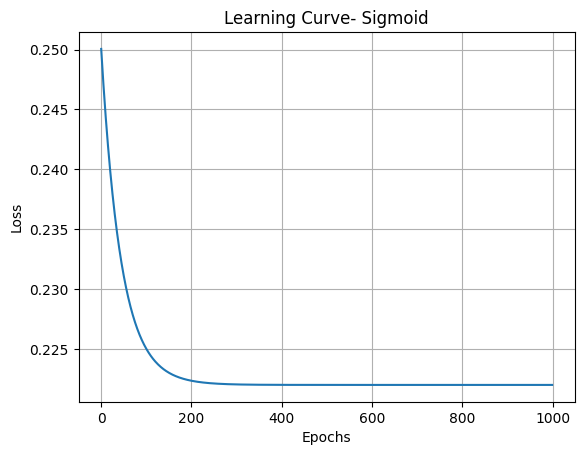

Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.03


In [6]:
# Sigmoid, learning rate 0.03
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Using the Sigmoid Activation Function First
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.sigmoid(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.sigmoid_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- Sigmoid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.03")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.22217580547379567
Epoch 200/1000, Loss: 0.2221757928445437
Epoch 300/1000, Loss: 0.22217577983679818
Epoch 400/1000, Loss: 0.22217576642158812
Epoch 500/1000, Loss: 0.2221757525723209
Epoch 600/1000, Loss: 0.2221757382608151
Epoch 700/1000, Loss: 0.22217572345716402
Epoch 800/1000, Loss: 0.22217570812958673
Epoch 900/1000, Loss: 0.2221756922442656
Epoch 1000/1000, Loss: 0.22217567576516797
Fold Validation Accuracy: 30.00%
Epoch 100/1000, Loss: 0.22179978829004934
Epoch 200/1000, Loss: 0.22179907331364743
Epoch 300/1000, Loss: 0.22179824602636983
Epoch 400/1000, Loss: 0.2217972810376737
Epoch 500/1000, Loss: 0.2217961456152329
Epoch 600/1000, Loss: 0.22179479703405475
Epoch 700/1000, Loss: 0.22179317869381757
Epoch 800/1000, Loss: 0.22179121437422483
Epoch 900/1000, Loss: 0.22178879954220918
Epoch 1000/1000, Loss: 0.22178578786281852
Fold Validation Accuracy: 23.33%
Epoch 100/1000, Loss: 0.22203873988216272
Epoch 200/1000, Loss: 0.2220383026693527
Epoch 300/1000,

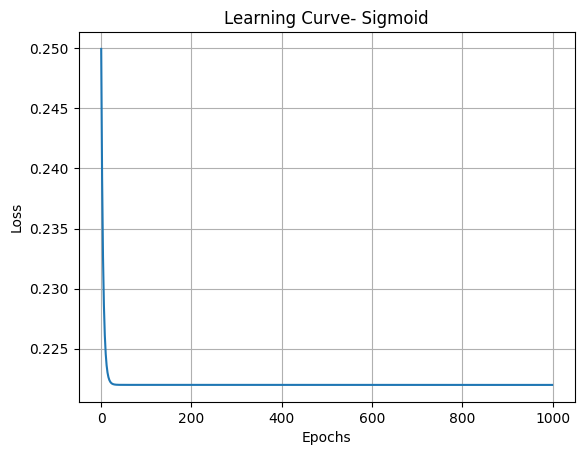

Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.3


In [7]:
# Sigmoid, learning rate 0.3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Using the Sigmoid Activation Function First
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.sigmoid(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.sigmoid_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- Sigmoid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.3")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.22942918710313012
Epoch 200/1000, Loss: 0.22332211831610158
Epoch 300/1000, Loss: 0.22040698664859476
Epoch 400/1000, Loss: 0.21812550980046044
Epoch 500/1000, Loss: 0.215479995176869
Epoch 600/1000, Loss: 0.2119579613814602
Epoch 700/1000, Loss: 0.20724568461182957
Epoch 800/1000, Loss: 0.20120198202751283
Epoch 900/1000, Loss: 0.19389946632742003
Epoch 1000/1000, Loss: 0.1856324963775197
Fold Validation Accuracy: 80.00%
Epoch 100/1000, Loss: 0.23159929194790935
Epoch 200/1000, Loss: 0.22431025503169771
Epoch 300/1000, Loss: 0.22158137213297266
Epoch 400/1000, Loss: 0.22020419456856108
Epoch 500/1000, Loss: 0.21911438135312464
Epoch 600/1000, Loss: 0.2179036812996983
Epoch 700/1000, Loss: 0.21636766166720584
Epoch 800/1000, Loss: 0.2143663615668909
Epoch 900/1000, Loss: 0.2117877671062663
Epoch 1000/1000, Loss: 0.20854989217455397
Fold Validation Accuracy: 23.33%
Epoch 100/1000, Loss: 0.2303188679876051
Epoch 200/1000, Loss: 0.2230226263669451
Epoch 300/1000, L

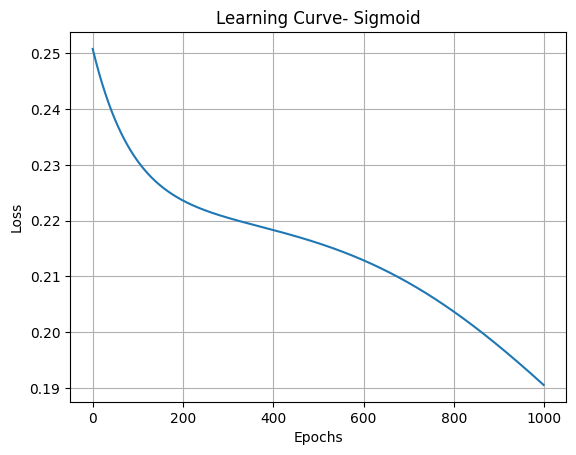

Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.01


In [8]:
# Sigmoid, Reducing Number of Layers since increasing them had less of an impact
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Using the Sigmoid Activation Function First
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.sigmoid(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.sigmoid_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- Sigmoid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.17956490394777494
Epoch 200/1000, Loss: 0.11956893025527203
Epoch 300/1000, Loss: 0.10806121453730227
Epoch 400/1000, Loss: 0.10364231137844195
Epoch 500/1000, Loss: 0.10065899612253612
Epoch 600/1000, Loss: 0.09801648056230283
Epoch 700/1000, Loss: 0.09525086226075329
Epoch 800/1000, Loss: 0.09195177393407075
Epoch 900/1000, Loss: 0.08767453093432488
Epoch 1000/1000, Loss: 0.08217871169362889
Fold Validation Accuracy: 93.33%
Epoch 100/1000, Loss: 0.1988214299149111
Epoch 200/1000, Loss: 0.13470335269392777
Epoch 300/1000, Loss: 0.1139838745679897
Epoch 400/1000, Loss: 0.10460714846955763
Epoch 500/1000, Loss: 0.0957125301166176
Epoch 600/1000, Loss: 0.08565109010674785
Epoch 700/1000, Loss: 0.07558777475322129
Epoch 800/1000, Loss: 0.06667370099335258
Epoch 900/1000, Loss: 0.058876906267235705
Epoch 1000/1000, Loss: 0.051842353735684375
Fold Validation Accuracy: 86.67%
Epoch 100/1000, Loss: 0.1688240133032742
Epoch 200/1000, Loss: 0.11816759818016193
Epoch 300/

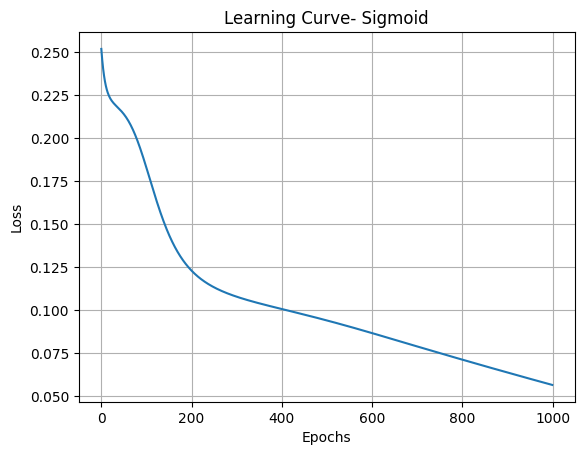

Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.1


In [9]:
# Sigmoid, learning rate 0.1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Using the Sigmoid Activation Function First
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.sigmoid(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.sigmoid_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- Sigmoid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.1")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.2209114273795468
Epoch 200/1000, Loss: 0.21379407702723532
Epoch 300/1000, Loss: 0.19916219073363
Epoch 400/1000, Loss: 0.17537762644893642
Epoch 500/1000, Loss: 0.15081290585138796
Epoch 600/1000, Loss: 0.1330926933351596
Epoch 700/1000, Loss: 0.1222124161611813
Epoch 800/1000, Loss: 0.11552329471562653
Epoch 900/1000, Loss: 0.11109973050667551
Epoch 1000/1000, Loss: 0.10789622532369757
Fold Validation Accuracy: 83.33%
Epoch 100/1000, Loss: 0.21859767976172223
Epoch 200/1000, Loss: 0.2077917505279288
Epoch 300/1000, Loss: 0.18667052934595232
Epoch 400/1000, Loss: 0.1599632073725033
Epoch 500/1000, Loss: 0.13916507974679637
Epoch 600/1000, Loss: 0.12639883701248997
Epoch 700/1000, Loss: 0.11876398187144757
Epoch 800/1000, Loss: 0.11388552862445
Epoch 900/1000, Loss: 0.1104800313895386
Epoch 1000/1000, Loss: 0.10789158197634323
Fold Validation Accuracy: 80.00%
Epoch 100/1000, Loss: 0.220390945477553
Epoch 200/1000, Loss: 0.21152914700252998
Epoch 300/1000, Loss: 

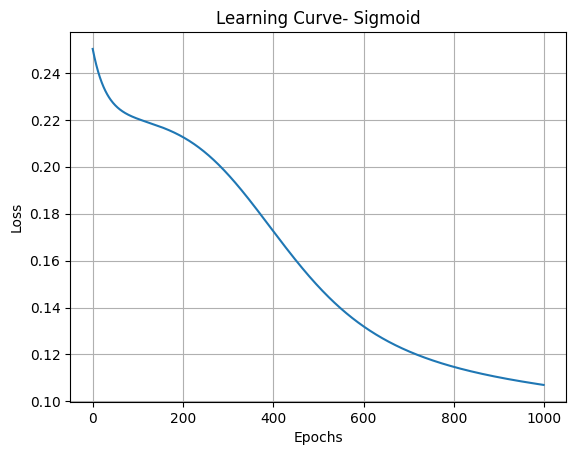

Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.03


In [10]:
# Sigmoid, learning rate 0.03
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Using the Sigmoid Activation Function First
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.sigmoid(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.sigmoid_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- Sigmoid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.03")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.10854170868836456
Epoch 200/1000, Loss: 0.09680301799369422
Epoch 300/1000, Loss: 0.07937485878365927
Epoch 400/1000, Loss: 0.05161562727270109
Epoch 500/1000, Loss: 0.030753586079211064
Epoch 600/1000, Loss: 0.020622011262928477
Epoch 700/1000, Loss: 0.01624385350563253
Epoch 800/1000, Loss: 0.01415302649688623
Epoch 900/1000, Loss: 0.013006076764990196
Epoch 1000/1000, Loss: 0.01229878833716127
Fold Validation Accuracy: 100.00%
Epoch 100/1000, Loss: 0.11205342671208945
Epoch 200/1000, Loss: 0.07994502554639288
Epoch 300/1000, Loss: 0.05010210055027015
Epoch 400/1000, Loss: 0.03077391770974016
Epoch 500/1000, Loss: 0.020867270399126933
Epoch 600/1000, Loss: 0.016121072609515105
Epoch 700/1000, Loss: 0.013587495319270079
Epoch 800/1000, Loss: 0.01203708957253548
Epoch 900/1000, Loss: 0.010978039869998853
Epoch 1000/1000, Loss: 0.01019724491412119
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.10641111089826241
Epoch 200/1000, Loss: 0.08649294808216065


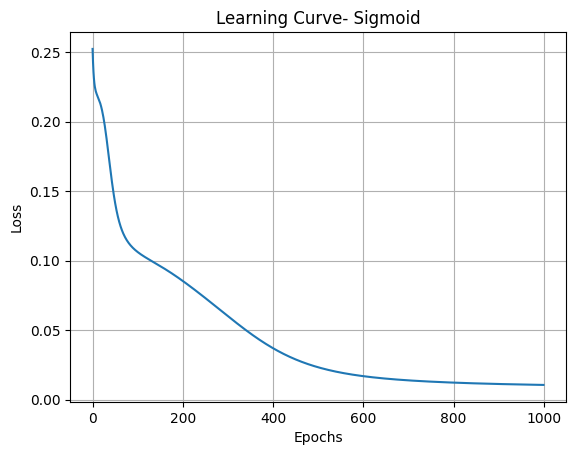

Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.3


In [11]:
# Sigmoid, learning rate 0.3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Using the Sigmoid Activation Function First
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.sigmoid(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.sigmoid_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- Sigmoid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.3")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.23812129118754607
Epoch 200/1000, Loss: 0.22458191437368322
Epoch 300/1000, Loss: 0.22243413802293088
Epoch 400/1000, Loss: 0.22112993233919284
Epoch 500/1000, Loss: 0.2198857165227063
Epoch 600/1000, Loss: 0.21854551754290238
Epoch 700/1000, Loss: 0.21681115243976506
Epoch 800/1000, Loss: 0.21420757164737203
Epoch 900/1000, Loss: 0.2100470515182409
Epoch 1000/1000, Loss: 0.20309931450563765
Fold Validation Accuracy: 90.00%
Epoch 100/1000, Loss: 0.2348695261080405
Epoch 200/1000, Loss: 0.22179377338271555
Epoch 300/1000, Loss: 0.21886040978881194
Epoch 400/1000, Loss: 0.2164059736609756
Epoch 500/1000, Loss: 0.21263923065527576
Epoch 600/1000, Loss: 0.2058752236998949
Epoch 700/1000, Loss: 0.19355188641505275
Epoch 800/1000, Loss: 0.17225103847444628
Epoch 900/1000, Loss: 0.1450741093928417
Epoch 1000/1000, Loss: 0.12612265467169007
Fold Validation Accuracy: 76.67%
Epoch 100/1000, Loss: 0.23571478584966918
Epoch 200/1000, Loss: 0.22218685998668755
Epoch 300/1000

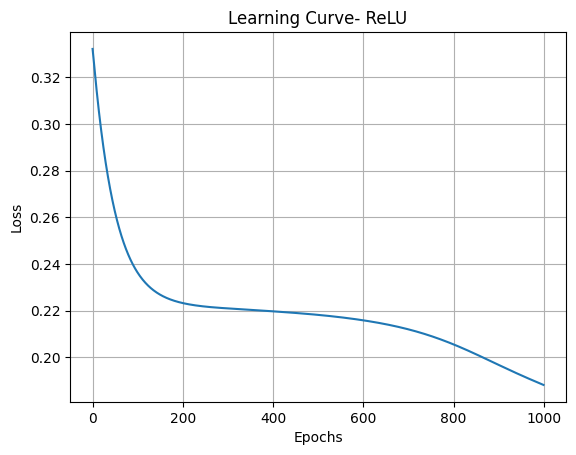

Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.01


In [12]:
# Relu
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.23605502593188882
Epoch 200/1000, Loss: 0.222643789403687
Epoch 300/1000, Loss: 0.22003185150209012
Epoch 400/1000, Loss: 0.21830056466992667
Epoch 500/1000, Loss: 0.21572346650377056
Epoch 600/1000, Loss: 0.21137912272107376
Epoch 700/1000, Loss: 0.2034060763024301
Epoch 800/1000, Loss: 0.18852160902308812
Epoch 900/1000, Loss: 0.16402797331599542
Epoch 1000/1000, Loss: 0.13738359031180064
Fold Validation Accuracy: 73.33%
Epoch 100/1000, Loss: 0.23346228412659367
Epoch 200/1000, Loss: 0.2175125182397227
Epoch 300/1000, Loss: 0.21212756268646835
Epoch 400/1000, Loss: 0.20579777500663196
Epoch 500/1000, Loss: 0.19551469115465103
Epoch 600/1000, Loss: 0.17852483524757143
Epoch 700/1000, Loss: 0.15335154649453442
Epoch 800/1000, Loss: 0.12576738601908444
Epoch 900/1000, Loss: 0.10722660566681738
Epoch 1000/1000, Loss: 0.09739517295292226
Fold Validation Accuracy: 83.33%
Epoch 100/1000, Loss: 0.2357827770931309
Epoch 200/1000, Loss: 0.22156899324643092
Epoch 300/100

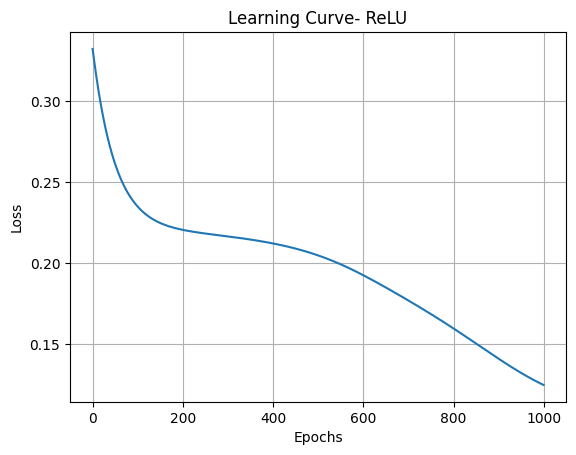

Number of Hidden Layers: 2, Neurons per Layer: 10, 10. Learning Rate: 0.01


In [28]:
# Relu
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 10, 10. Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.17684564827118038
Epoch 200/1000, Loss: 0.11148702798704732
Epoch 300/1000, Loss: 0.10576672030690268
Epoch 400/1000, Loss: 0.08483227238716326
Epoch 500/1000, Loss: 0.03711800674925683
Epoch 600/1000, Loss: 0.019497631921828667
Epoch 700/1000, Loss: 0.01585521887937195
Epoch 800/1000, Loss: 0.014747212196873149
Epoch 900/1000, Loss: 0.014102602658028592
Epoch 1000/1000, Loss: 0.013650164375116703
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.15259253323276042
Epoch 200/1000, Loss: 0.11506889472382856
Epoch 300/1000, Loss: 0.10702410300070532
Epoch 400/1000, Loss: 0.05649777015811418
Epoch 500/1000, Loss: 0.026297173817873106
Epoch 600/1000, Loss: 0.019554243205775625
Epoch 700/1000, Loss: 0.017742240136813397
Epoch 800/1000, Loss: 0.01651177666603514
Epoch 900/1000, Loss: 0.015584723772382292
Epoch 1000/1000, Loss: 0.014805492904188809
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.10570699156877067
Epoch 200/1000, Loss: 0.04466921926812753

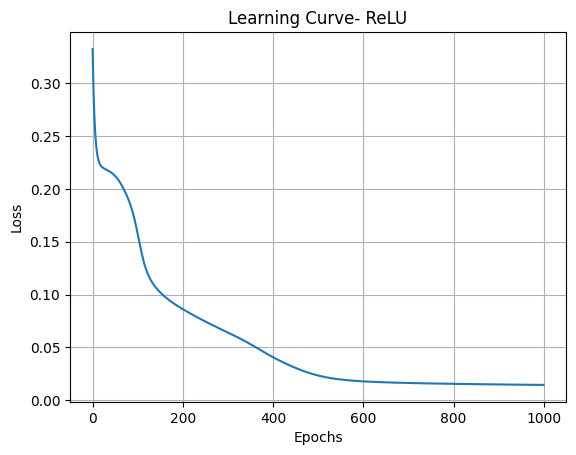

Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.1


In [13]:
# Relu
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.1")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.12928547134054963
Epoch 200/1000, Loss: 0.06933603483116858
Epoch 300/1000, Loss: 0.03310251306763206
Epoch 400/1000, Loss: 0.021440306130066162
Epoch 500/1000, Loss: 0.019626815356740285
Epoch 600/1000, Loss: 0.018836499380048968
Epoch 700/1000, Loss: 0.018118003928720934
Epoch 800/1000, Loss: 0.0175055965724503
Epoch 900/1000, Loss: 0.017028259413223452
Epoch 1000/1000, Loss: 0.016634227920520484
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.16285293598655073
Epoch 200/1000, Loss: 0.07219803091462397
Epoch 300/1000, Loss: 0.03268934525110592
Epoch 400/1000, Loss: 0.022356901910818888
Epoch 500/1000, Loss: 0.01997062654270434
Epoch 600/1000, Loss: 0.01885629200929319
Epoch 700/1000, Loss: 0.017934477069094016
Epoch 800/1000, Loss: 0.017228940917271143
Epoch 900/1000, Loss: 0.01662537473459378
Epoch 1000/1000, Loss: 0.01606566034060225
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.11337591182114681
Epoch 200/1000, Loss: 0.08536833795309874


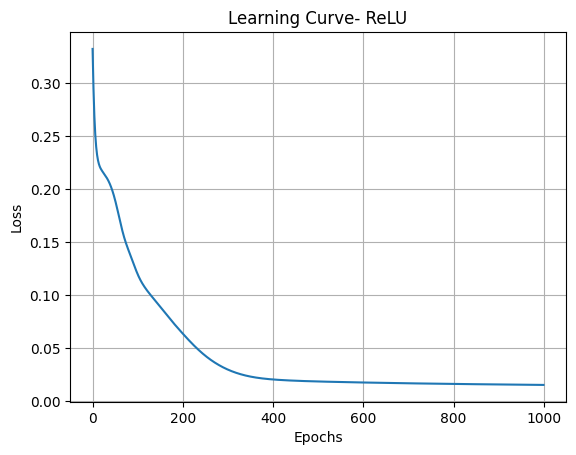

Number of Hidden Layers: 2, Neurons per Layer: 10, 10 Learning Rate: 0.1


In [29]:
# Relu
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 10, 10 Learning Rate: 0.1")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.20127256275364777
Epoch 200/1000, Loss: 0.13254197053981506
Epoch 300/1000, Loss: 0.11160132989073278
Epoch 400/1000, Loss: 0.10694849484529059
Epoch 500/1000, Loss: 0.09925384530915352
Epoch 600/1000, Loss: 0.08423527707104801
Epoch 700/1000, Loss: 0.06567266208383382
Epoch 800/1000, Loss: 0.05119982839958595
Epoch 900/1000, Loss: 0.04011901550940525
Epoch 1000/1000, Loss: 0.031488883417439696
Fold Validation Accuracy: 100.00%
Epoch 100/1000, Loss: 0.20405136351976289
Epoch 200/1000, Loss: 0.15694808779899905
Epoch 300/1000, Loss: 0.12144611892958632
Epoch 400/1000, Loss: 0.10099828262771082
Epoch 500/1000, Loss: 0.08071638458328081
Epoch 600/1000, Loss: 0.0610007400532272
Epoch 700/1000, Loss: 0.04501027954838805
Epoch 800/1000, Loss: 0.034884774666416034
Epoch 900/1000, Loss: 0.029019401234463397
Epoch 1000/1000, Loss: 0.02547948739543935
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.20939554777082214
Epoch 200/1000, Loss: 0.165410843882722
Epoch 3

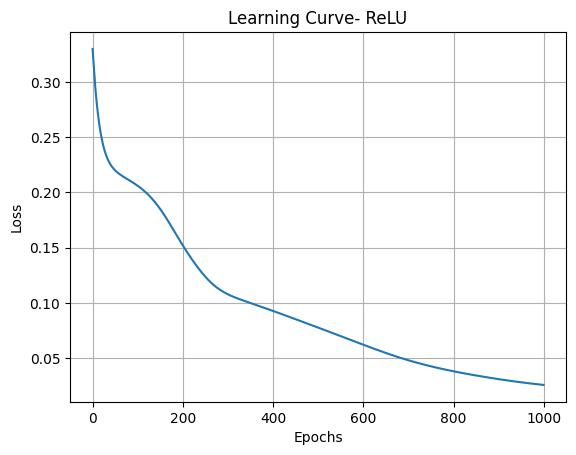

Number of Hidden Layers: 2, Neurons per Layer: 10, 10 Learning Rate: 0.03


In [30]:
# Relu
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 10, 10 Learning Rate: 0.03")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.22010974136338968
Epoch 200/1000, Loss: 0.21232963820879497
Epoch 300/1000, Loss: 0.16604060691213332
Epoch 400/1000, Loss: 0.11653979477886224
Epoch 500/1000, Loss: 0.11267477909494249
Epoch 600/1000, Loss: 0.11162087420659975
Epoch 700/1000, Loss: 0.11043743320469276
Epoch 800/1000, Loss: 0.10876039528169332
Epoch 900/1000, Loss: 0.10592443573940653
Epoch 1000/1000, Loss: 0.10085574627267149
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.22150417367230876
Epoch 200/1000, Loss: 0.22009811226904497
Epoch 300/1000, Loss: 0.21711295107810463
Epoch 400/1000, Loss: 0.20479215973998374
Epoch 500/1000, Loss: 0.14886062820973894
Epoch 600/1000, Loss: 0.11789174345974167
Epoch 700/1000, Loss: 0.11661389904104179
Epoch 800/1000, Loss: 0.11633286193933738
Epoch 900/1000, Loss: 0.11614800468103902
Epoch 1000/1000, Loss: 0.11597284244113144
Fold Validation Accuracy: 66.67%
Epoch 100/1000, Loss: 0.21959329455438056
Epoch 200/1000, Loss: 0.21088659038973467
Epoch 30

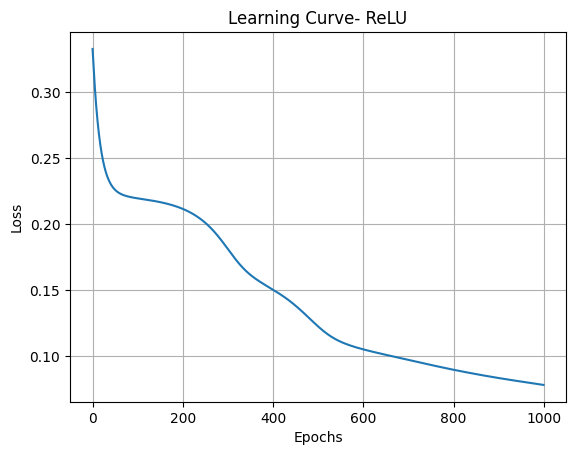

Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.03


In [14]:
# Relu
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.03")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.09838506998487734
Epoch 200/1000, Loss: 0.015654013178035244
Epoch 300/1000, Loss: 0.013439599240742037
Epoch 400/1000, Loss: 0.012552974297785614
Epoch 500/1000, Loss: 0.01204996337313123
Epoch 600/1000, Loss: 0.011667631139528971
Epoch 700/1000, Loss: 0.011353799952487496
Epoch 800/1000, Loss: 0.011102713620235365
Epoch 900/1000, Loss: 0.010882546837626036
Epoch 1000/1000, Loss: 0.010684213705320396
Fold Validation Accuracy: 100.00%
Epoch 100/1000, Loss: 0.042197341296631996
Epoch 200/1000, Loss: 0.019710318546752866
Epoch 300/1000, Loss: 0.018278563566305448
Epoch 400/1000, Loss: 0.017757938952713215
Epoch 500/1000, Loss: 0.0175124573323858
Epoch 600/1000, Loss: 0.017100349004630915
Epoch 700/1000, Loss: 0.016364133245054473
Epoch 800/1000, Loss: 0.015411405316675088
Epoch 900/1000, Loss: 0.014108169729404334
Epoch 1000/1000, Loss: 0.012781247555699538
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.10710619232592097
Epoch 200/1000, Loss: 0.017519041

<ipython-input-15-101fe2338789>:81: RuntimeWarning: invalid value encountered in multiply
  gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])


Epoch 700/1000, Loss: nan
Epoch 800/1000, Loss: nan
Epoch 900/1000, Loss: nan
Epoch 1000/1000, Loss: nan
Fold Validation Accuracy: 26.67%
Epoch 100/1000, Loss: 0.10014717210309522
Epoch 200/1000, Loss: 0.02163485855318607
Epoch 300/1000, Loss: 0.019325792909332742
Epoch 400/1000, Loss: 0.018544349638766666
Epoch 500/1000, Loss: 0.017864655729036998
Epoch 600/1000, Loss: 0.017074253485657807
Epoch 700/1000, Loss: 0.016098969342063115
Epoch 800/1000, Loss: 0.015016839042932443
Epoch 900/1000, Loss: 0.013960656006377942
Epoch 1000/1000, Loss: 0.013053027518727087
Fold Validation Accuracy: 100.00%


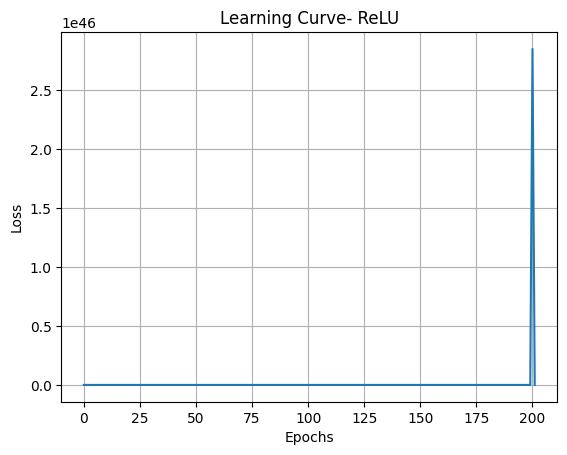

Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.3


In [15]:
# Relu
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.3")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.2365881308568612
Epoch 200/1000, Loss: 0.22401677692567393
Epoch 300/1000, Loss: 0.22244399624613037
Epoch 400/1000, Loss: 0.2222442915293122
Epoch 500/1000, Loss: 0.22221487134880313
Epoch 600/1000, Loss: 0.22220692142455956
Epoch 700/1000, Loss: 0.22220200270123422
Epoch 800/1000, Loss: 0.22219787218520742
Epoch 900/1000, Loss: 0.22219421400885647
Epoch 1000/1000, Loss: 0.22219093705284693
Fold Validation Accuracy: 30.00%
Epoch 100/1000, Loss: 0.23705030505100377
Epoch 200/1000, Loss: 0.22384810533389374
Epoch 300/1000, Loss: 0.22207917825456772
Epoch 400/1000, Loss: 0.221842215435803
Epoch 500/1000, Loss: 0.2218104672343915
Epoch 600/1000, Loss: 0.22180621362068897
Epoch 700/1000, Loss: 0.22180564372290817
Epoch 800/1000, Loss: 0.2218055673681888
Epoch 900/1000, Loss: 0.22180555713820832
Epoch 1000/1000, Loss: 0.22180555576759886
Fold Validation Accuracy: 23.33%
Epoch 100/1000, Loss: 0.23655218761725263
Epoch 200/1000, Loss: 0.22379098156083535
Epoch 300/1000

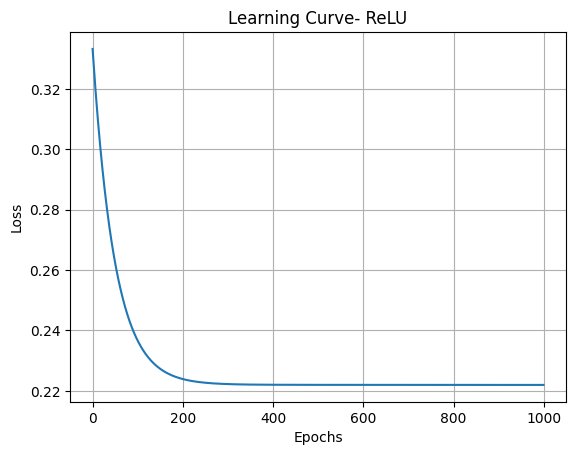

Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.01


In [16]:
# Relu- Changing Number of Hidden Layers to Test ReLU Activation Function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.22203464596637285
Epoch 200/1000, Loss: 0.22184812859324915
Epoch 300/1000, Loss: 0.2211088130965751
Epoch 400/1000, Loss: 0.21262048214736654
Epoch 500/1000, Loss: 0.11288107632598827
Epoch 600/1000, Loss: 0.1123336160017663
Epoch 700/1000, Loss: 0.11206021726811406
Epoch 800/1000, Loss: 0.11127125982390706
Epoch 900/1000, Loss: 0.10939542998491765
Epoch 1000/1000, Loss: 0.10402386261699197
Fold Validation Accuracy: 90.00%
Epoch 100/1000, Loss: 0.22180555565269597
Epoch 200/1000, Loss: 0.22180555555555553
Epoch 300/1000, Loss: 0.22180555555555553
Epoch 400/1000, Loss: 0.2218055555555556
Epoch 500/1000, Loss: 0.2218055555555556
Epoch 600/1000, Loss: 0.2218055555555556
Epoch 700/1000, Loss: 0.2218055555555556
Epoch 800/1000, Loss: 0.2218055555555556
Epoch 900/1000, Loss: 0.2218055555555556
Epoch 1000/1000, Loss: 0.2218055555555556
Fold Validation Accuracy: 23.33%
Epoch 100/1000, Loss: 0.22203703713397585
Epoch 200/1000, Loss: 0.22203703703703706
Epoch 300/1000, L

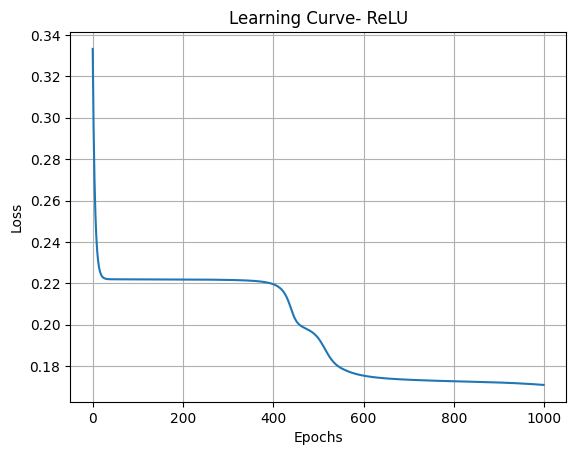

Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.1


In [17]:
# Relu- Changing Number of Hidden Layers to Test ReLU Activation Function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.1")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.22244306769252645
Epoch 200/1000, Loss: 0.222176529997844
Epoch 300/1000, Loss: 0.22217592729187813
Epoch 400/1000, Loss: 0.2221759259290147
Epoch 500/1000, Loss: 0.2221759259259329
Epoch 600/1000, Loss: 0.22217592592592597
Epoch 700/1000, Loss: 0.22217592592592597
Epoch 800/1000, Loss: 0.22217592592592592
Epoch 900/1000, Loss: 0.22217592592592597
Epoch 1000/1000, Loss: 0.2221759259259259
Fold Validation Accuracy: 30.00%
Epoch 100/1000, Loss: 0.221907191231181
Epoch 200/1000, Loss: 0.2215910062737784
Epoch 300/1000, Loss: 0.22152915688367614
Epoch 400/1000, Loss: 0.22144186355365017
Epoch 500/1000, Loss: 0.2213338722094199
Epoch 600/1000, Loss: 0.22118229973897946
Epoch 700/1000, Loss: 0.220957167566469
Epoch 800/1000, Loss: 0.22059831472740518
Epoch 900/1000, Loss: 0.2199759241403949
Epoch 1000/1000, Loss: 0.21876547400714713
Fold Validation Accuracy: 23.33%
Epoch 100/1000, Loss: 0.22229425131071529
Epoch 200/1000, Loss: 0.22204119966876185
Epoch 300/1000, Loss

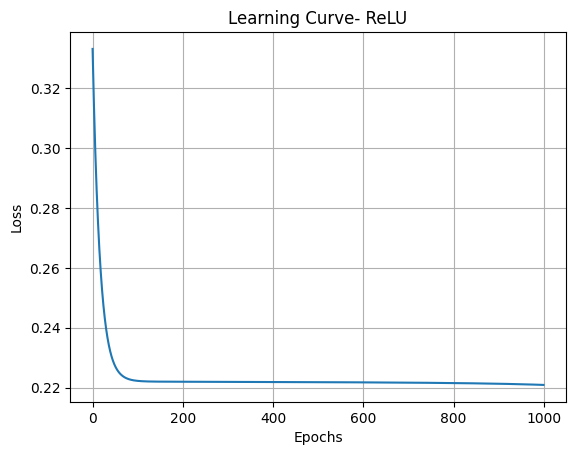

Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.03


In [18]:
# Relu- Changing Number of Hidden Layers to Test ReLU Activation Function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.03")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-19-203a5a607ebb>:81: RuntimeWarning: invalid value encountered in multiply
  gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])


Epoch 100/1000, Loss: 0.22188922539611913
Epoch 200/1000, Loss: 0.20931457036299458
Epoch 300/1000, Loss: 0.06132579298470043
Epoch 400/1000, Loss: nan
Epoch 500/1000, Loss: nan
Epoch 600/1000, Loss: nan
Epoch 700/1000, Loss: nan
Epoch 800/1000, Loss: nan
Epoch 900/1000, Loss: nan
Epoch 1000/1000, Loss: nan
Fold Validation Accuracy: 33.33%
Epoch 100/1000, Loss: 0.22082510371758252
Epoch 200/1000, Loss: 0.11107918337651547
Epoch 300/1000, Loss: 0.08739869226665588
Epoch 400/1000, Loss: nan
Epoch 500/1000, Loss: nan
Epoch 600/1000, Loss: nan
Epoch 700/1000, Loss: nan
Epoch 800/1000, Loss: nan
Epoch 900/1000, Loss: nan
Epoch 1000/1000, Loss: nan
Fold Validation Accuracy: 43.33%
Epoch 100/1000, Loss: 0.22203703703703706
Epoch 200/1000, Loss: 0.22203703703703706
Epoch 300/1000, Loss: 0.22203703703703706
Epoch 400/1000, Loss: 0.22203703703703706
Epoch 500/1000, Loss: 0.22203703703703706
Epoch 600/1000, Loss: 0.22203703703703706
Epoch 700/1000, Loss: 0.22203703703703706
Epoch 800/1000, Loss: 

<ipython-input-19-203a5a607ebb>:94: RuntimeWarning: overflow encountered in square
  loss = np.mean((y - activations[-1]) ** 2)


Epoch 300/1000, Loss: nan
Epoch 400/1000, Loss: nan
Epoch 500/1000, Loss: nan
Epoch 600/1000, Loss: nan
Epoch 700/1000, Loss: nan
Epoch 800/1000, Loss: nan
Epoch 900/1000, Loss: nan
Epoch 1000/1000, Loss: nan
Fold Validation Accuracy: 26.67%
Epoch 100/1000, Loss: 0.22155633890461854
Epoch 200/1000, Loss: 0.2111853878959163
Epoch 300/1000, Loss: 0.06820497038454101
Epoch 400/1000, Loss: nan
Epoch 500/1000, Loss: nan
Epoch 600/1000, Loss: nan
Epoch 700/1000, Loss: nan
Epoch 800/1000, Loss: nan
Epoch 900/1000, Loss: nan
Epoch 1000/1000, Loss: nan
Fold Validation Accuracy: 23.33%


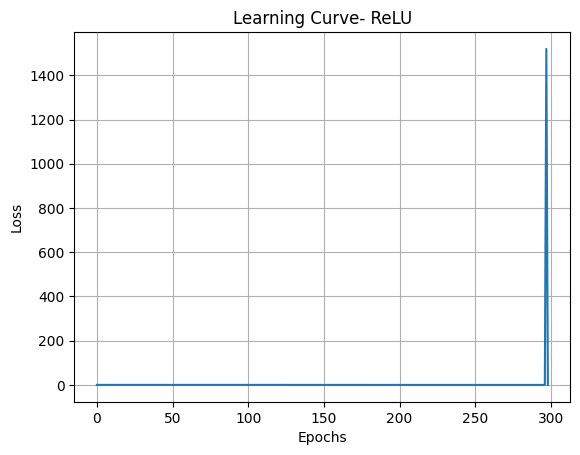

Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.3


In [19]:
# Relu- Changing Number of Hidden Layers to Test ReLU Activation Function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.3")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.22639165740550454
Epoch 200/1000, Loss: 0.19111198689363604
Epoch 300/1000, Loss: 0.15315952822709206
Epoch 400/1000, Loss: 0.12266627158925204
Epoch 500/1000, Loss: 0.10642058545350519
Epoch 600/1000, Loss: 0.09648688308931966
Epoch 700/1000, Loss: 0.08836939956071155
Epoch 800/1000, Loss: 0.08094305994516748
Epoch 900/1000, Loss: 0.07414091734805663
Epoch 1000/1000, Loss: 0.06808162642178733
Fold Validation Accuracy: 93.33%
Epoch 100/1000, Loss: 0.20504254360266103
Epoch 200/1000, Loss: 0.1559771562045834
Epoch 300/1000, Loss: 0.12148706447065108
Epoch 400/1000, Loss: 0.10255653956043027
Epoch 500/1000, Loss: 0.09129339516860618
Epoch 600/1000, Loss: 0.0822394856708714
Epoch 700/1000, Loss: 0.07428478660701657
Epoch 800/1000, Loss: 0.0674030201199706
Epoch 900/1000, Loss: 0.06169798589914532
Epoch 1000/1000, Loss: 0.05688886162606863
Fold Validation Accuracy: 93.33%
Epoch 100/1000, Loss: 0.2059302492819333
Epoch 200/1000, Loss: 0.15823325526636936
Epoch 300/10

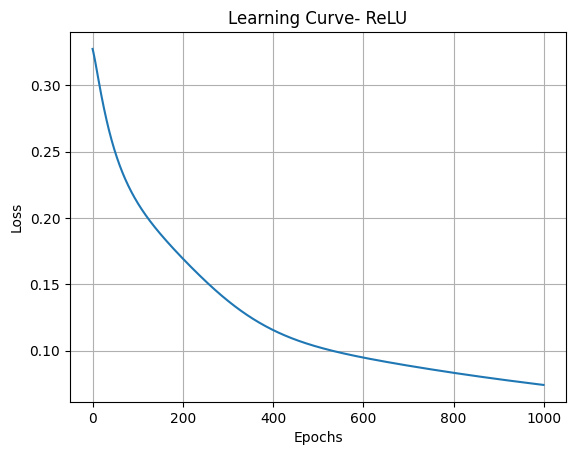

Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.01


In [20]:
# Relu- Lets reduce the number of layers and neurons to compare here too
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.06571776350841142
Epoch 200/1000, Loss: 0.03286237122452822
Epoch 300/1000, Loss: 0.022006510692293427
Epoch 400/1000, Loss: 0.019629573464994686
Epoch 500/1000, Loss: 0.01885367495091209
Epoch 600/1000, Loss: 0.018367318465597294
Epoch 700/1000, Loss: 0.01803074608746654
Epoch 800/1000, Loss: 0.017735610926690088
Epoch 900/1000, Loss: 0.017454087210936543
Epoch 1000/1000, Loss: 0.017154785212819
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.048643252475658566
Epoch 200/1000, Loss: 0.02846469316519338
Epoch 300/1000, Loss: 0.023157536865552053
Epoch 400/1000, Loss: 0.021539261378348558
Epoch 500/1000, Loss: 0.020665116837256286
Epoch 600/1000, Loss: 0.020041652969253556
Epoch 700/1000, Loss: 0.019590645967305382
Epoch 800/1000, Loss: 0.019251996360259153
Epoch 900/1000, Loss: 0.019006771872719774
Epoch 1000/1000, Loss: 0.01882061048749172
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.05950375510021324
Epoch 200/1000, Loss: 0.031208218259777

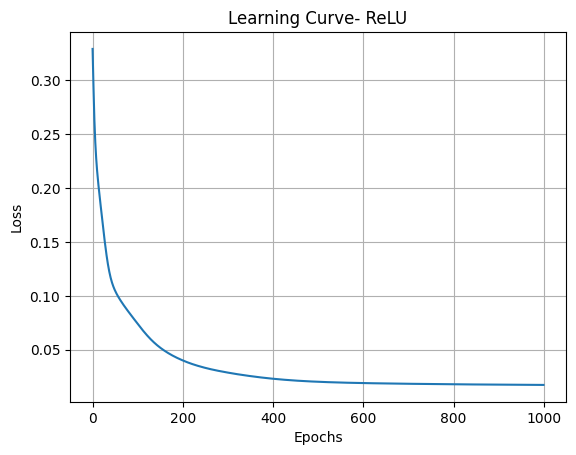

Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.1


In [21]:
# Relu
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.1")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.13208461557877563
Epoch 200/1000, Loss: 0.08674056134090959
Epoch 300/1000, Loss: 0.06616522412677904
Epoch 400/1000, Loss: 0.05175516433369186
Epoch 500/1000, Loss: 0.04162964579546041
Epoch 600/1000, Loss: 0.03418403387048796
Epoch 700/1000, Loss: 0.02892828578569936
Epoch 800/1000, Loss: 0.02544990004845351
Epoch 900/1000, Loss: 0.02328929024270734
Epoch 1000/1000, Loss: 0.02197258248204986
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.16393632268137645
Epoch 200/1000, Loss: 0.0908236443326108
Epoch 300/1000, Loss: 0.06829958753287071
Epoch 400/1000, Loss: 0.05346790090496929
Epoch 500/1000, Loss: 0.04344120288616739
Epoch 600/1000, Loss: 0.03640013499335214
Epoch 700/1000, Loss: 0.031429974707139964
Epoch 800/1000, Loss: 0.027999253147346366
Epoch 900/1000, Loss: 0.025679670609234668
Epoch 1000/1000, Loss: 0.0241493775607829
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.14530707966693693
Epoch 200/1000, Loss: 0.07757237184578912
Epoch 3

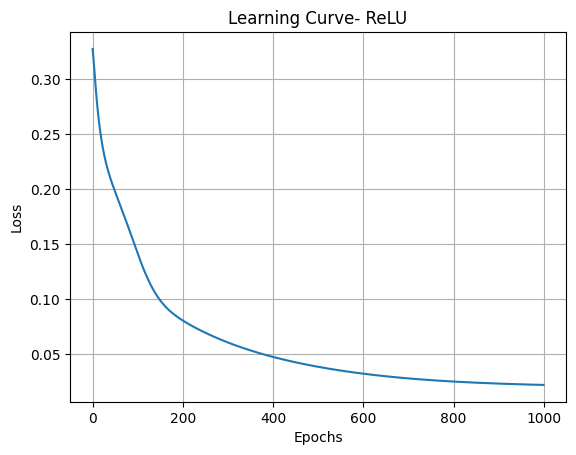

Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.03


In [22]:
# Relu-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.03")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.02281460357621977
Epoch 200/1000, Loss: 0.019293274714650168
Epoch 300/1000, Loss: 0.018374695796812758
Epoch 400/1000, Loss: 0.01751532557350449
Epoch 500/1000, Loss: 0.01681912851306074
Epoch 600/1000, Loss: 0.016496723812985635
Epoch 700/1000, Loss: 0.016284143291287793
Epoch 800/1000, Loss: 0.01602725890055134
Epoch 900/1000, Loss: 0.015747255712452262
Epoch 1000/1000, Loss: 0.015505621678419098
Fold Validation Accuracy: 100.00%
Epoch 100/1000, Loss: 0.024171421856472117
Epoch 200/1000, Loss: 0.020733782136222914
Epoch 300/1000, Loss: 0.020014237360577967
Epoch 400/1000, Loss: 0.019401556838282718
Epoch 500/1000, Loss: 0.018900126149058005
Epoch 600/1000, Loss: 0.0185933648944334
Epoch 700/1000, Loss: 0.01834835173995946
Epoch 800/1000, Loss: 0.018113853786683586
Epoch 900/1000, Loss: 0.01787119161464727
Epoch 1000/1000, Loss: 0.01758437995439862
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.021344159288442154
Epoch 200/1000, Loss: 0.0176563301888

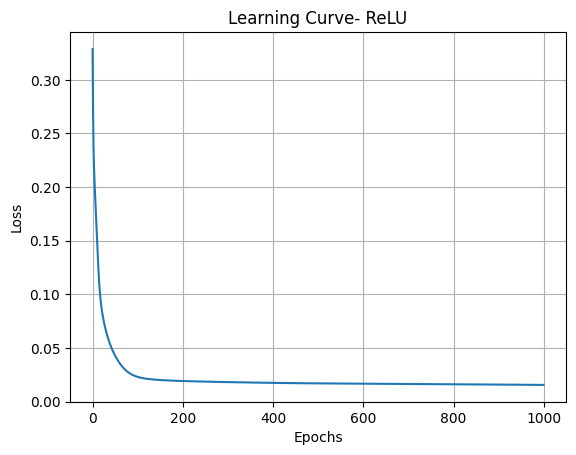

Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.3


In [23]:
# Relu
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.relu(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.relu_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- ReLU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.3")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.24054693553818823
Epoch 200/1000, Loss: 0.22470137871276732
Epoch 300/1000, Loss: 0.22032308950139828
Epoch 400/1000, Loss: 0.21673399523530376
Epoch 500/1000, Loss: 0.2109764766476052
Epoch 600/1000, Loss: 0.19986253939031368
Epoch 700/1000, Loss: 0.17940504016588277
Epoch 800/1000, Loss: 0.15283535543778212
Epoch 900/1000, Loss: 0.1353352731709793
Epoch 1000/1000, Loss: 0.12969296089607035
Fold Validation Accuracy: 70.00%
Epoch 100/1000, Loss: 0.23446217942856815
Epoch 200/1000, Loss: 0.21741052831196642
Epoch 300/1000, Loss: 0.20886575320493786
Epoch 400/1000, Loss: 0.19569505960492206
Epoch 500/1000, Loss: 0.17260334137902886
Epoch 600/1000, Loss: 0.14529798498253393
Epoch 700/1000, Loss: 0.12942565113594115
Epoch 800/1000, Loss: 0.12500356870103266
Epoch 900/1000, Loss: 0.12448990856909514
Epoch 1000/1000, Loss: 0.12461085189036081
Fold Validation Accuracy: 66.67%
Epoch 100/1000, Loss: 0.23541049179317583
Epoch 200/1000, Loss: 0.22189612548427212
Epoch 300/

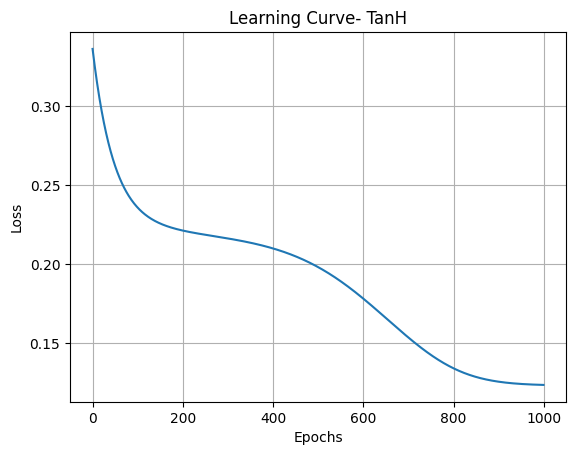

Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.01


In [24]:
# TanH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.tanh(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.tanh_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- TanH')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 5, 5. Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.2209626736676726
Epoch 200/1000, Loss: 0.18001448710620727
Epoch 300/1000, Loss: 0.14268863066330434
Epoch 400/1000, Loss: 0.12471931394663083
Epoch 500/1000, Loss: 0.12117845293347872
Epoch 600/1000, Loss: 0.12044116916014842
Epoch 700/1000, Loss: 0.11970282326707833
Epoch 800/1000, Loss: 0.11867206603466239
Epoch 900/1000, Loss: 0.11739423308432782
Epoch 1000/1000, Loss: 0.11594555982422118
Fold Validation Accuracy: 76.67%
Epoch 100/1000, Loss: 0.2246854265150433
Epoch 200/1000, Loss: 0.19575274829111536
Epoch 300/1000, Loss: 0.16359704488020688
Epoch 400/1000, Loss: 0.13609174273191
Epoch 500/1000, Loss: 0.12784109266579702
Epoch 600/1000, Loss: 0.12695491266154607
Epoch 700/1000, Loss: 0.12682169087737247
Epoch 800/1000, Loss: 0.12644247486889854
Epoch 900/1000, Loss: 0.12580764296288344
Epoch 1000/1000, Loss: 0.12497821241466725
Fold Validation Accuracy: 66.67%
Epoch 100/1000, Loss: 0.2325870641937566
Epoch 200/1000, Loss: 0.21103483960050515
Epoch 300/1000

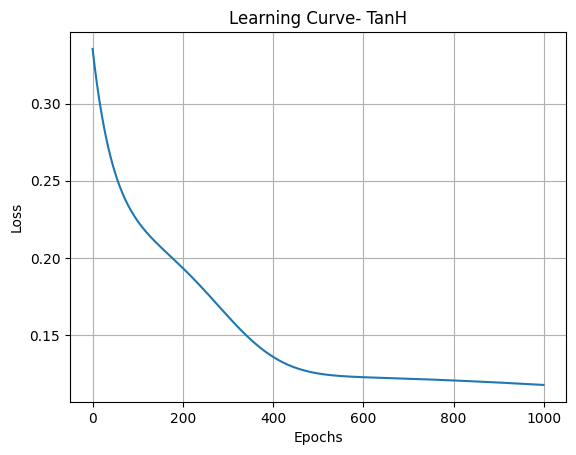

Number of Hidden Layers: 2, Neurons per Layer: 10, 10. Learning Rate: 0.01


In [25]:
# TanH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.tanh(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.tanh_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- TanH')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 10, 10. Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.11331510304489005
Epoch 200/1000, Loss: 0.09672830613768356
Epoch 300/1000, Loss: 0.0769577589702051
Epoch 400/1000, Loss: 0.043088633691410604
Epoch 500/1000, Loss: 0.027188449936591016
Epoch 600/1000, Loss: 0.025429313029499533
Epoch 700/1000, Loss: 0.025073645439400643
Epoch 800/1000, Loss: 0.024677206125827834
Epoch 900/1000, Loss: 0.024245274219200485
Epoch 1000/1000, Loss: 0.023814937953372924
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.11937020797208782
Epoch 200/1000, Loss: 0.09487781240810837
Epoch 300/1000, Loss: 0.07389332301840794
Epoch 400/1000, Loss: 0.04610487600020026
Epoch 500/1000, Loss: 0.031837262256461975
Epoch 600/1000, Loss: 0.029865734309597762
Epoch 700/1000, Loss: 0.029886977659634436
Epoch 800/1000, Loss: 0.029640530067877233
Epoch 900/1000, Loss: 0.029136767781021488
Epoch 1000/1000, Loss: 0.028497073099015686
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.11663492453394737
Epoch 200/1000, Loss: 0.10502070812170

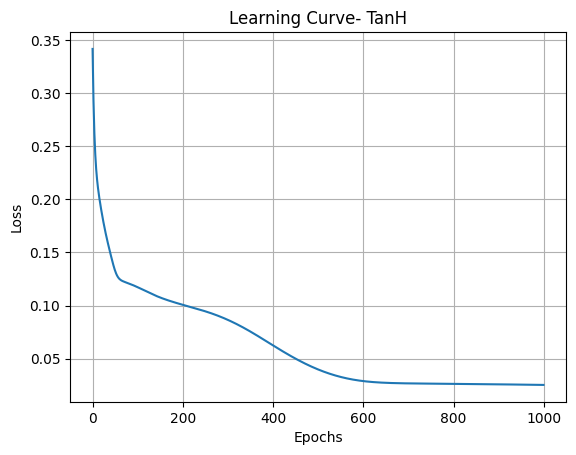

Number of Hidden Layers: 2, Neurons per Layer: 10, 10. Learning Rate: 0.1


In [31]:
# TanH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.tanh(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.tanh_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- TanH')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 10, 10. Learning Rate: 0.1")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.15044577920128765
Epoch 200/1000, Loss: 0.12662953347015968
Epoch 300/1000, Loss: 0.1242146988451183
Epoch 400/1000, Loss: 0.12180632594572068
Epoch 500/1000, Loss: 0.11893016771651399
Epoch 600/1000, Loss: 0.11490609540723179
Epoch 700/1000, Loss: 0.110206644437591
Epoch 800/1000, Loss: 0.10657938727013799
Epoch 900/1000, Loss: 0.1043273461763809
Epoch 1000/1000, Loss: 0.1022634494149765
Fold Validation Accuracy: 90.00%
Epoch 100/1000, Loss: 0.14388061968348634
Epoch 200/1000, Loss: 0.11970587587060283
Epoch 300/1000, Loss: 0.11358112039319809
Epoch 400/1000, Loss: 0.10568821924673458
Epoch 500/1000, Loss: 0.09941141913225467
Epoch 600/1000, Loss: 0.09414229760607387
Epoch 700/1000, Loss: 0.08790010680008073
Epoch 800/1000, Loss: 0.07998522848746673
Epoch 900/1000, Loss: 0.07053661544569725
Epoch 1000/1000, Loss: 0.060113214395295975
Fold Validation Accuracy: 83.33%
Epoch 100/1000, Loss: 0.16425587328600297
Epoch 200/1000, Loss: 0.12184129393987474
Epoch 300/10

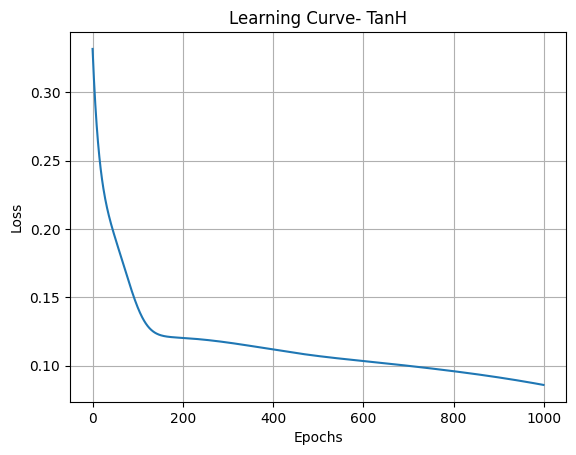

Number of Hidden Layers: 2, Neurons per Layer: 10, 10. Learning Rate: 0.03


In [32]:
# TanH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.tanh(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.tanh_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- TanH')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 10, 10. Learning Rate: 0.03")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.0963378700066275
Epoch 200/1000, Loss: 0.02672644001154957
Epoch 300/1000, Loss: 0.02424387741355023
Epoch 400/1000, Loss: 0.022460777434056715
Epoch 500/1000, Loss: 0.020353746432547667
Epoch 600/1000, Loss: 0.017971109784116934
Epoch 700/1000, Loss: 0.015835507337660888
Epoch 800/1000, Loss: 0.014276047994059023
Epoch 900/1000, Loss: 0.01322785467239467
Epoch 1000/1000, Loss: 0.012525890505471808
Fold Validation Accuracy: 100.00%
Epoch 100/1000, Loss: 0.06893774073847782
Epoch 200/1000, Loss: 0.028401075330053406
Epoch 300/1000, Loss: 0.027146930993233277
Epoch 400/1000, Loss: 0.025003496079252268
Epoch 500/1000, Loss: 0.022574806011443682
Epoch 600/1000, Loss: 0.019802254042670234
Epoch 700/1000, Loss: 0.017088088789209723
Epoch 800/1000, Loss: 0.015001869567139102
Epoch 900/1000, Loss: 0.013604312345564583
Epoch 1000/1000, Loss: 0.012587751232166289
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.08976728156082851
Epoch 200/1000, Loss: 0.02500586286

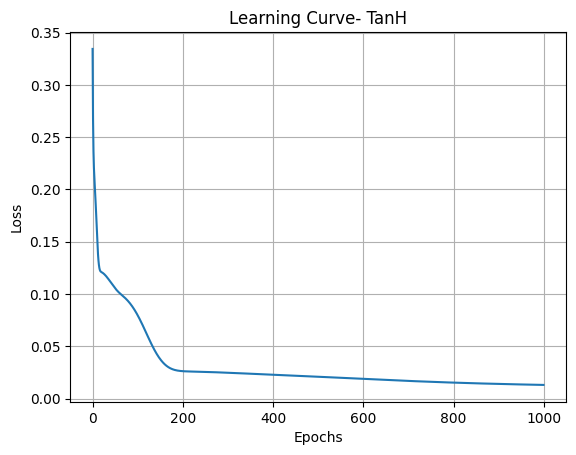

Number of Hidden Layers: 2, Neurons per Layer: 10, 10. Learning Rate: 0.3


In [33]:
# TanH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.tanh(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.tanh_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- TanH')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 2, Neurons per Layer: 10, 10. Learning Rate: 0.3")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.2370907756535047
Epoch 200/1000, Loss: 0.22408171593069592
Epoch 300/1000, Loss: 0.22208082865386486
Epoch 400/1000, Loss: 0.2216160664504638
Epoch 500/1000, Loss: 0.22134690457183584
Epoch 600/1000, Loss: 0.22105726535987252
Epoch 700/1000, Loss: 0.22069081463201898
Epoch 800/1000, Loss: 0.22020335054782447
Epoch 900/1000, Loss: 0.2195313573214472
Epoch 1000/1000, Loss: 0.21857047144812924
Fold Validation Accuracy: 63.33%
Epoch 100/1000, Loss: 0.23794297048803859
Epoch 200/1000, Loss: 0.22449927419031507
Epoch 300/1000, Loss: 0.22243857281151264
Epoch 400/1000, Loss: 0.22208395666821548
Epoch 500/1000, Loss: 0.2220044300829949
Epoch 600/1000, Loss: 0.22197197864294196
Epoch 700/1000, Loss: 0.22194876233645738
Epoch 800/1000, Loss: 0.22192822669649026
Epoch 900/1000, Loss: 0.2219090882733908
Epoch 1000/1000, Loss: 0.22189098159195547
Fold Validation Accuracy: 23.33%
Epoch 100/1000, Loss: 0.2375134361684368
Epoch 200/1000, Loss: 0.22414615366103563
Epoch 300/1000

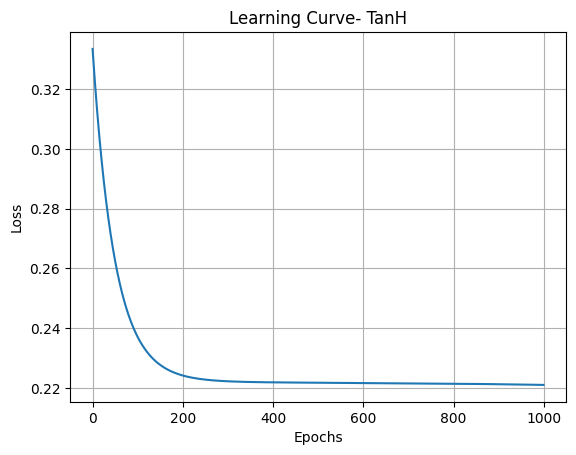

Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.01


In [34]:
# TanH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.tanh(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.tanh_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- TanH')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.22145889298591856
Epoch 200/1000, Loss: 0.21208674296540042
Epoch 300/1000, Loss: 0.11893369279545107
Epoch 400/1000, Loss: 0.11523492345578723
Epoch 500/1000, Loss: 0.11268363800773634
Epoch 600/1000, Loss: 0.1104808853016795
Epoch 700/1000, Loss: 0.10775742491037885
Epoch 800/1000, Loss: 0.10317921442965425
Epoch 900/1000, Loss: 0.09178117887715004
Epoch 1000/1000, Loss: 0.05625837605041022
Fold Validation Accuracy: 93.33%
Epoch 100/1000, Loss: 0.2172996480763563
Epoch 200/1000, Loss: 0.12848751539748246
Epoch 300/1000, Loss: 0.12507153961278772
Epoch 400/1000, Loss: 0.12159800439991696
Epoch 500/1000, Loss: 0.11854785841776877
Epoch 600/1000, Loss: 0.1155682012090194
Epoch 700/1000, Loss: 0.11163046365570474
Epoch 800/1000, Loss: 0.10314494016674443
Epoch 900/1000, Loss: 0.07064101436397927
Epoch 1000/1000, Loss: 0.03028808415192552
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.22105440123064174
Epoch 200/1000, Loss: 0.17905578377037648
Epoch 300/1

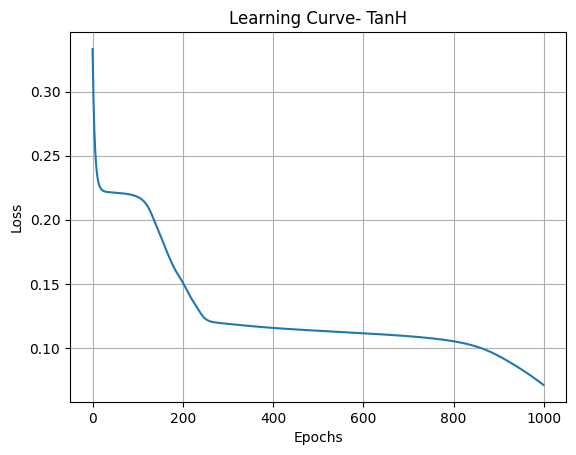

Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.1


In [35]:
# TanH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.tanh(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.tanh_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- TanH')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.1")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.2222336630821806
Epoch 200/1000, Loss: 0.22162971579304988
Epoch 300/1000, Loss: 0.22112559145884955
Epoch 400/1000, Loss: 0.22008338156426205
Epoch 500/1000, Loss: 0.21730291572742336
Epoch 600/1000, Loss: 0.206547275766128
Epoch 700/1000, Loss: 0.15875043769272393
Epoch 800/1000, Loss: 0.1256830417487067
Epoch 900/1000, Loss: 0.1221417673806073
Epoch 1000/1000, Loss: 0.11999295323639368
Fold Validation Accuracy: 70.00%
Epoch 100/1000, Loss: 0.2218837925572815
Epoch 200/1000, Loss: 0.2215039513439733
Epoch 300/1000, Loss: 0.22140790723946951
Epoch 400/1000, Loss: 0.2212812120690871
Epoch 500/1000, Loss: 0.22110269738410468
Epoch 600/1000, Loss: 0.22083277314326782
Epoch 700/1000, Loss: 0.22038391411919583
Epoch 800/1000, Loss: 0.21952825614227617
Epoch 900/1000, Loss: 0.21752214663107455
Epoch 1000/1000, Loss: 0.2110261467563726
Fold Validation Accuracy: 40.00%
Epoch 100/1000, Loss: 0.22228341156026157
Epoch 200/1000, Loss: 0.22179769849035832
Epoch 300/1000, L

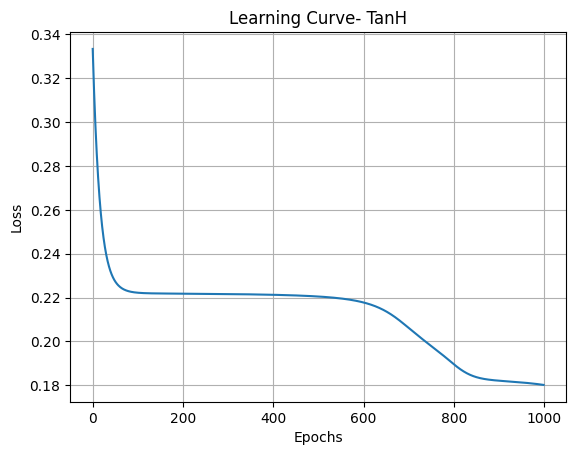

Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.03


In [36]:
# TanH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.tanh(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.tanh_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- TanH')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.03")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.22200808227082688
Epoch 200/1000, Loss: 0.1292973963503961
Epoch 300/1000, Loss: 0.1116848333125987
Epoch 400/1000, Loss: 0.06454757797387636
Epoch 500/1000, Loss: 0.017820841711467385
Epoch 600/1000, Loss: 0.01669044117153914
Epoch 700/1000, Loss: 0.016033851560402632
Epoch 800/1000, Loss: 0.01559173573281871
Epoch 900/1000, Loss: 0.01526237497049148
Epoch 1000/1000, Loss: 0.014994387835195338
Fold Validation Accuracy: 100.00%
Epoch 100/1000, Loss: 0.22139725355825798
Epoch 200/1000, Loss: 0.12408638644536407
Epoch 300/1000, Loss: 0.11643652389853275
Epoch 400/1000, Loss: 0.08763836925311956
Epoch 500/1000, Loss: 0.020532173993844473
Epoch 600/1000, Loss: 0.018584233947198103
Epoch 700/1000, Loss: 0.017408581281357152
Epoch 800/1000, Loss: 0.016541763553895136
Epoch 900/1000, Loss: 0.015850994899323356
Epoch 1000/1000, Loss: 0.015275241972330428
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.1494989711124398
Epoch 200/1000, Loss: 0.10912664164878791
E

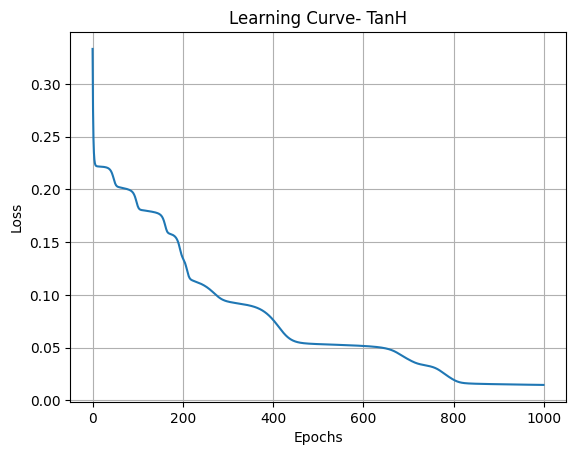

Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.3


In [37]:
# TanH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.tanh(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.tanh_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- TanH')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
#layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 3, Neurons per Layer: 4, 4, 2. Learning Rate: 0.3")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.16243306156285311
Epoch 200/1000, Loss: 0.12233080336895986
Epoch 300/1000, Loss: 0.11265423736784032
Epoch 400/1000, Loss: 0.1094618679315
Epoch 500/1000, Loss: 0.10743056647867984
Epoch 600/1000, Loss: 0.10582031284726783
Epoch 700/1000, Loss: 0.10452774894735889
Epoch 800/1000, Loss: 0.10347443944568654
Epoch 900/1000, Loss: 0.10256688106952755
Epoch 1000/1000, Loss: 0.10172129236524712
Fold Validation Accuracy: 90.00%
Epoch 100/1000, Loss: 0.19497197634033173
Epoch 200/1000, Loss: 0.13991987120178812
Epoch 300/1000, Loss: 0.12139853412933989
Epoch 400/1000, Loss: 0.11554717594363538
Epoch 500/1000, Loss: 0.11209296549034195
Epoch 600/1000, Loss: 0.10929717992401208
Epoch 700/1000, Loss: 0.10704733038844719
Epoch 800/1000, Loss: 0.10534013427275796
Epoch 900/1000, Loss: 0.10409739605090715
Epoch 1000/1000, Loss: 0.1031985566867145
Fold Validation Accuracy: 80.00%
Epoch 100/1000, Loss: 0.20332244997762766
Epoch 200/1000, Loss: 0.14657889375356103
Epoch 300/100

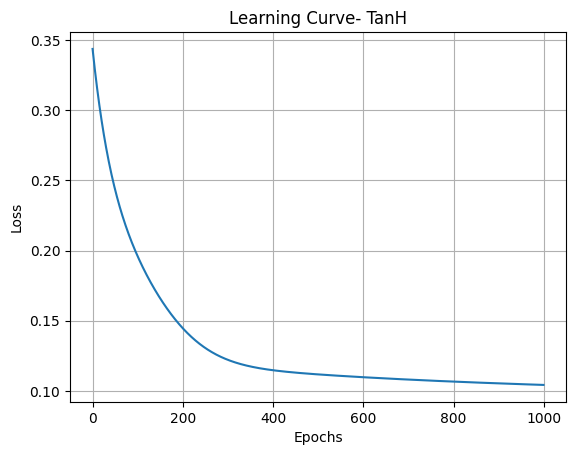

Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.01


In [38]:
# TanH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.tanh(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.tanh_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- TanH')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.01")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.09998044702228089
Epoch 200/1000, Loss: 0.0877055211577703
Epoch 300/1000, Loss: 0.07078940003363579
Epoch 400/1000, Loss: 0.052257595262181364
Epoch 500/1000, Loss: 0.03796398801466719
Epoch 600/1000, Loss: 0.03050058600028079
Epoch 700/1000, Loss: 0.027624164491750848
Epoch 800/1000, Loss: 0.02672107076278563
Epoch 900/1000, Loss: 0.0264852278718699
Epoch 1000/1000, Loss: 0.026427583939128845
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.09756903985522515
Epoch 200/1000, Loss: 0.08130907710905144
Epoch 300/1000, Loss: 0.06179730289984195
Epoch 400/1000, Loss: 0.04451652475179641
Epoch 500/1000, Loss: 0.03397117128868746
Epoch 600/1000, Loss: 0.029526063840870705
Epoch 700/1000, Loss: 0.028035730887503194
Epoch 800/1000, Loss: 0.027598154208989874
Epoch 900/1000, Loss: 0.02748100568420938
Epoch 1000/1000, Loss: 0.027442642262947868
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.10473384483538976
Epoch 200/1000, Loss: 0.09286215897426627
Epo

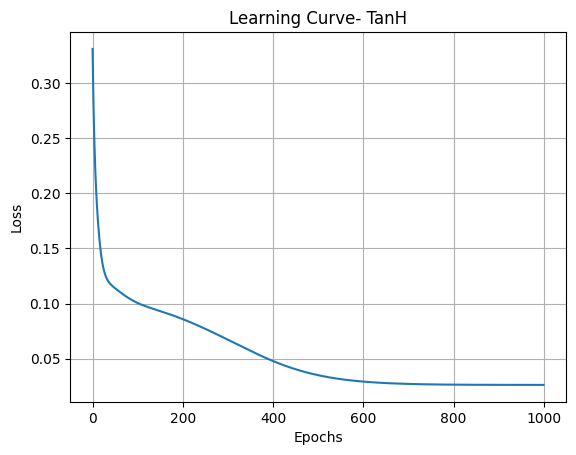

Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.1


In [39]:
# TanH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.tanh(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.tanh_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- TanH')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
learning_rate = 0.1
#learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.1")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.11791278796285237
Epoch 200/1000, Loss: 0.10823911618456966
Epoch 300/1000, Loss: 0.10505222042717433
Epoch 400/1000, Loss: 0.10399398403939336
Epoch 500/1000, Loss: 0.10324147236245482
Epoch 600/1000, Loss: 0.10216344396127108
Epoch 700/1000, Loss: 0.10054522019503419
Epoch 800/1000, Loss: 0.09816935100193809
Epoch 900/1000, Loss: 0.09480872009381416
Epoch 1000/1000, Loss: 0.09035552965498882
Fold Validation Accuracy: 90.00%
Epoch 100/1000, Loss: 0.1264939072872767
Epoch 200/1000, Loss: 0.11867263085149066
Epoch 300/1000, Loss: 0.11057498913250717
Epoch 400/1000, Loss: 0.10401106952394434
Epoch 500/1000, Loss: 0.100078975095495
Epoch 600/1000, Loss: 0.09678196180763958
Epoch 700/1000, Loss: 0.09321420871471618
Epoch 800/1000, Loss: 0.08917874554769176
Epoch 900/1000, Loss: 0.08453025725379576
Epoch 1000/1000, Loss: 0.07914851406361227
Fold Validation Accuracy: 83.33%
Epoch 100/1000, Loss: 0.12720382509757064
Epoch 200/1000, Loss: 0.11633779492153545
Epoch 300/1

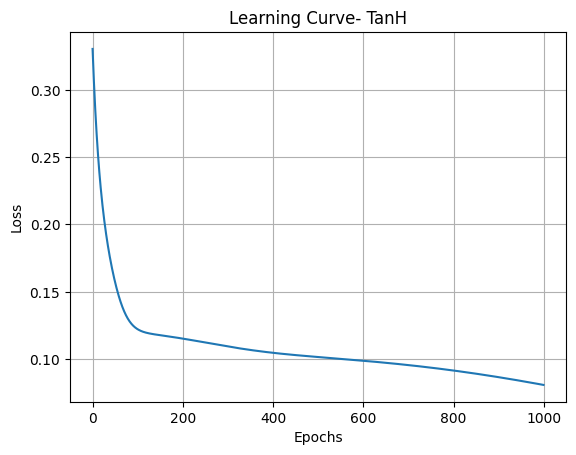

Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.03


In [40]:
# TanH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.tanh(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.tanh_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- TanH')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
learning_rate = 0.03
#learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.03")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.09077773454113643
Epoch 200/1000, Loss: 0.03382472990059013
Epoch 300/1000, Loss: 0.025380446436303987
Epoch 400/1000, Loss: 0.025393334631045254
Epoch 500/1000, Loss: 0.024802928920853378
Epoch 600/1000, Loss: 0.023595803379325916
Epoch 700/1000, Loss: 0.022542206018047406
Epoch 800/1000, Loss: 0.021809263742204238
Epoch 900/1000, Loss: 0.021261925469299302
Epoch 1000/1000, Loss: 0.020804338696739987
Fold Validation Accuracy: 100.00%
Epoch 100/1000, Loss: 0.08897604836012264
Epoch 200/1000, Loss: 0.034058316734489044
Epoch 300/1000, Loss: 0.026849999496643642
Epoch 400/1000, Loss: 0.027027754166195125
Epoch 500/1000, Loss: 0.026734557450385645
Epoch 600/1000, Loss: 0.02581262506923585
Epoch 700/1000, Loss: 0.024462529176914397
Epoch 800/1000, Loss: 0.023041426706886883
Epoch 900/1000, Loss: 0.0219743412532671
Epoch 1000/1000, Loss: 0.021185687857682937
Fold Validation Accuracy: 96.67%
Epoch 100/1000, Loss: 0.07615820075634373
Epoch 200/1000, Loss: 0.02830541115

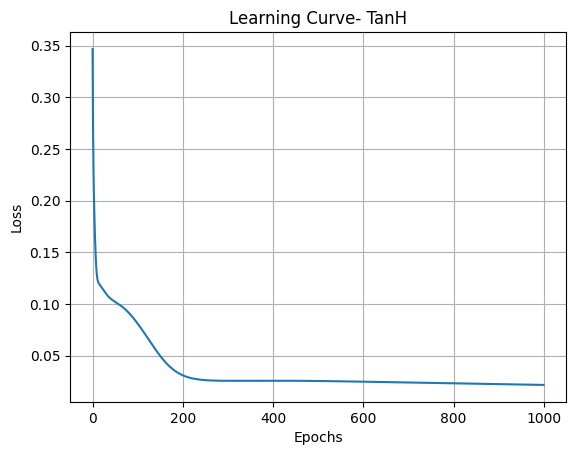

Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.3


In [41]:
# TanH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Neural Network Class Designed to Take Any Number of Layers and Any Number of Neurons per Layer for Later Impact Evaluation
class NeuralNetwork:
# Initializing the Neural Network. Initialized with the Number of Layers and Number of Neurons in Each Layer Called from the Main Program
    def __init__(self, layers):
        self.layers = layers
# Initializing a List for Weights. These will later be used to Determine the Influence Input Data has on the Output Product
        self.weights = []
# Initializing a List of Bias.  These will Help our Network Propagate Forward.
        self.biases = []

# Each Layer will need to be initialized with Weights and Bias.  Loop until Number of Layers is Complete.
        for i in range(len(layers) - 1):
            matrix_of_weights = np.random.randn(layers[i], layers[i + 1]) * 0.1
            vector_of_bias  = np.zeros((1, layers[i + 1]))
            self.weights.append(matrix_of_weights)
            self.biases.append(vector_of_bias )


# Given the Input Data X, Return the Predicted Output.
    def predict(self, X):
        activations = self.forward_propagation(X)
        return activations[-1]

# Given the Input Data X, Return the Predicted Classes/Output
    def predict_classes(self, X):
        predictions = self.predict(X)
        return np.argmax(predictions, axis = 1)

# Various Activation Functions
# Ran into issues when trying to Call with a Selected Activation Function, so Wrote Activation Functions in Separately
    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
      return x * (1 - x)

    def relu(self, x):
      return np.maximum(0, x)

    def relu_derivative(self, x):
      return np.where(x > 0, 1, 0)

    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1 - np.tanh(x)**2

# Forward Propagation Through Our Network. Called with Parameter X, Which Represents the Input Data
# A List of Activations will be Returns for Each of the Layers
    def forward_propagation(self, x):
        activations_list  = [x]
        for i in range(len(self.weights)):
            net_input = np.dot(activations_list [-1], self.weights[i]) + self.biases[i]
            activation = self.tanh(net_input)
            activations_list .append(activation)
        return activations_list

# Backward Propagate.  Weights and Bias will be updated accordingly here.
# Called with a List of Forward Propagation Activations, The True Labels of the Data, and the Learning Rate to Allow us to Update Weights.
    def backpropagation(self, activations, y_true, learning_rate):
        m = y_true.shape[0]
# Get the Gradient of the Error
        gradient_error = activations[-1] - y_true
# Get and Update the Bias and Weights by Getting the Gradient of them
        for i in reversed(range(len(self.weights))):
            grad_weight = np.dot(activations[i].T, gradient_error) / m
            grad_bias = np.sum(gradient_error, axis = 0, keepdims = True) / m
            self.weights[i] -= learning_rate * grad_weight
            self.biases[i] -= learning_rate * grad_bias
            if i > 0:
                gradient_error = np.dot(gradient_error, self.weights[i].T) * self.tanh_derivative(activations[i])

# With the Training Data, we Can Now Train our Neural Network.
# Called with Our Training Data, True Labels of that Training Data, Number of Iterations to Train, and the Learning Rate to Allow us to Update Weights.
    def train(self, X, y, epochs, learning_rate):
# Need to Return a List of the Losses for Learning Curves
        losses = []
        for epoch in range(epochs):
# Forward Propagate Through the Network
            activations = self.forward_propagation(X)
# Backward Propagate
            self.backpropagation(activations, y, learning_rate)
# Calculate the Loss for Model Evaluation
            loss = np.mean((y - activations[-1]) ** 2)
            losses.append(loss)
# Print Performance for Each Epoch
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
        return losses


# Cross Validation to Test Training vs. Testing Set Accuracy
def cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5):
    kf = KFold(n_splits = k_folds, shuffle = True, random_state = 42)
    fold_losses = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        nn.__init__(nn.layers)
        losses = nn.train(X_train, y_train, epochs, learning_rate)
        fold_losses.append(losses)
        val_predictions = nn.predict_classes(X_val)
        y_val_classes = np.argmax(y_val, axis = 1)
        val_accuracy = np.mean(val_predictions == y_val_classes)
        print(f'Fold Validation Accuracy: {val_accuracy * 100:.2f}%')
    mean_losses = np.mean(fold_losses, axis = 0)
    plt.plot(range(epochs), mean_losses)
    plt.title('Learning Curve- TanH')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
# Transform the dataset to use in Neural Network
encoder = OneHotEncoder(sparse = False)
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose a Number of Layers and Neurons in Each Layer
# The first number is the Input from the Iris Dataset and Last Number if the Number of Output Classes
# Numbers in between are the Number of Layers and number of Neurons in Each Layer
# Various Network Layers and Neurons for Testing Purposes
# 2 Hidden Layers, both with 5 neurons each
#layers = [4, 5, 5, 3]
# 3 Hidden Layers, First 2 with 4 neurons each, third Layer with 2 neurons
#layers = [4, 4, 4, 2, 3]
# 1 Hidden Layer with 5 neurons
layers = [4, 5, 3]
# 2 Hidden Layers with 10 neurons each
#layers = [4, 10, 10, 3]

# Create the Neural Network With the Specified Layers and Neurons
nn = NeuralNetwork(layers)
# Specify the Number of Iterations
epochs = 1000

# Specify the learning Rate, Use Different Learning Rates to test Performance
#learning_rate = 0.01
#learning_rate = 0.1
#learning_rate = 0.03
learning_rate = 0.3

# Call Cross Validation and Plot the Learning Curve
cross_validate_and_plot(nn, X, y, epochs, learning_rate, k_folds = 5)

# Print Number of Layers, Number of Neurons Per Layer, and Learning Rate Used
print("Number of Hidden Layers: 1, Neurons per Layer: 5. Learning Rate: 0.3")